# Practica 4 Redes Neuronales
## Descripción del problema y dataset
Este trabajo contiene datos para la estimación de los niveles de obesidad en personas de los países de México, Perú y Colombia, con edades entre 14 y 61 años y diversos hábitos alimentarios y condición física como lo menciona , los datos se recolectaron utilizando una plataforma web con una encuesta (ver Tabla 1) donde usuarios anónimos respondieron cada pregunta, luego se procesó la información obteniendo 17 atributos y 2111 registros Los atributos relacionados con los hábitos alimentarios son: Consumo frecuente de alimentos altos en calorías (FANG), Frecuencia de consumo de verduras (FCVC), Número de comidas principales (NCP), Consumo de alimentos entre comidas (CAEC), Consumo de agua diario (CH2O) y Consumo de alcohol (CALC). Los atributos relacionados con la condición física son: Monitoreo del consumo de calorías (SCC), Frecuencia de actividad física (PAP), Tiempo usando dispositivos tecnológicos (TUE), Transporte usado (MTRANS), otras variables obtenidas fueron: Sexo, Edad, Altura y Peso. Finalmente, se etiquetaron todos los datos y se creó la variable de clase NObesidad con los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III, con base en la Ecuación y información de la OMS y Normatividad mexicana.
## Preparación de datos (limpieza y preprocesamiento)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
from tensorflow.python.keras.utils import data_utils

In [ ]:
url='https://raw.githubusercontent.com/gorbo96/RedNeuronal1/main/ObesityDataSet_raw_and_data_sinthetic.csv'
datos=pd.read_csv(url,sep=",")
datos

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
categorico=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','CALC','MTRANS']
numerico=['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
auxiliar=['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
preprocesador = make_column_transformer(    
    ('passthrough',numerico),(OneHotEncoder(),categorico),('drop',['NObeyesdad'])
    )
DataSet=preprocesador.fit_transform(datos)
nombres = preprocesador.transformers_[1][1].get_feature_names(categorico)
auxiliar.extend(nombres)
DatasetPreprocesado = pd.DataFrame(data=DataSet,columns=auxiliar)
DatasetPreprocesado.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
DatasetPreprocesado.to_csv("final.csv",sep=",");

In [ ]:
DatasetPreprocesado.shape

(2111, 29)

## DISEÑO DE RED NEURONAL DE PRUEBA Y EVALUACION


In [ ]:
dataset=np.loadtxt("final.csv", delimiter=",",skiprows=1)
x=dataset[:,1:29]
np.delete(x, 3, axis=0)
y=dataset[:,3]

y=np.reshape(y, (-1,1))

#Normalización
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


## DIVISION EN TRAIN Y TEST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=28, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                348       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
26/26 [==============================] - 0s 7ms/step - loss: 0.0523 - mse: 0.0523 - mae: 0.1899 - val_loss: 0.0445 - val_mse: 0.0445 - val_mae: 0.1821
Epoch 2/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1696 - val_loss: 0.0361 - val_mse: 0.0361 - val_mae: 0.1613
Epoch 3/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0356 - mse: 0.0356 - mae: 0.1579 - val_loss: 0.0326 - val_mse: 0.0326 - val_mae: 0.1526
Epoch 4/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0318 - mse: 0.0318 - mae: 0.1498 - val_loss: 0.0290 - val_mse: 0.0290 - val_mae: 0.1437
Epoch 5/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0277 - mse: 0.0277 - mae: 0.1402 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1324
Epoch 6/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.1285 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.1181
Epoch 7/150
26/26 [===

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


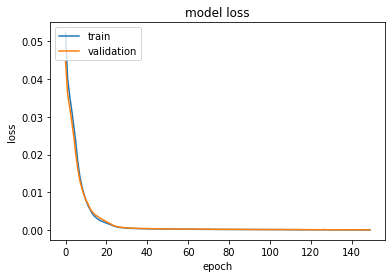

In [ ]:
#Visualización de accuracy
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## PREDICCION - USO DEL MODELO DE PRUEBA 

In [ ]:
#Predicciones:

Xnew = np.array([[21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0]])#nuevo cliente

Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[21.    1.62 64.    2.    3.    2.    0.    1.    1.    0.    0.    1.
  1.    0.    0.    0.    1.    0.    1.    0.    0.    0.    0.    1.
  0.    0.    0.    1.  ], Predicted=[64.16748]


## ALMACENAMIENTO Y CARGA DE MODELOS DE REDES NEURONALES

In [ ]:
def guardarRNN(model,nombreArchivoModelo,nombreArchivoPesos):
    print("Guardando Red Neuronal en Archivo")  
    # serializar modelo a JSON

    # Guardar los Pesos (weights)
    model.save_weights(nombreArchivoPesos+'.h5')

    # Guardar la Arquitectura del modelo
    with open(nombreArchivoModelo+'.json', 'w') as f:
        f.write(model.to_json())

    print("Red Neuronal Grabada en Archivo")   
    
def cargarRNN(nombreArchivoModelo,nombreArchivoPesos):
        
    # Cargar la Arquitectura desde el archivo JSON
    with open(nombreArchivoModelo+'.json', 'r') as f:
        model = model_from_json(f.read())

    # Cargar Pesos (weights) en el nuevo modelo
    model.load_weights(nombreArchivoPesos+'.h5')  

    print("Red Neuronal Cargada desde Archivo") 
    return model